<a href="https://colab.research.google.com/github/N-Yo96/gateway-remote-config/blob/master/gateway_uplink_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Distance Estimation Model Formulation**

In [ ]:
#DISTANCE ESTIMATION MODEL
import pandas as pd
import numpy as np
import statsmodels.api as sm

# --- START: DATA LOADING/TRANSCRIPTION ---
# NOTE: Replace this section with: df = pd.read_csv('your_file_name.csv')
# if you have the file saved locally.
csv_data = """
Distance,SF,SNR,RSSI
2,7,6,-100
3,7,0.5,-103
5,7,1.5,-103
7,7,-2.25,-106
9,7,-5.25,-107
11,7,-8,-108
18.6,7,-2.75,-114
24.2,7,-0.25,-113
29.5,7,2.25,-111
38,7,-1.75,-113
11,12,-15,-106
21,12,-14.75,-106
21,9,-10.75,-108
30,10,-5.5,-108
11,10,6.75,-95
"""
from io import StringIO
df = pd.read_csv(StringIO(csv_data))
# --- END: DATA LOADING/TRANSCRIPTION ---


# 1. Prepare Data for Regression (Log-Transformation)
df['log_Distance'] = np.log10(df['Distance'])
X = df[['SF', 'SNR', 'RSSI']]
y = df['log_Distance']
X = sm.add_constant(X) # Add intercept term

# 2. Perform Multiple Linear Regression
model = sm.OLS(y, X).fit()

# Extract coefficients
c0 = model.params['const']
c1 = model.params['SF']
c2 = model.params['SNR']
c3 = model.params['RSSI']

# 3. Define the estimation function
def estimate_distance(sf, snr, rssi, c0, c1, c2, c3):
    """Calculates estimated distance using the derived model coefficients."""
    # log10(Distance) = c0 + c1*SF + c2*SNR + c3*RSSI
    log_distance = c0 + (c1 * sf) + (c2 * snr) + (c3 * rssi)

    # Distance = 10^(log10(Distance))
    estimated_D = 10**log_distance
    return estimated_D

# 4. Apply the function to new/existing data
df['Estimated_Distance'] = df.apply(
    lambda row: estimate_distance(row['SF'], row['SNR'], row['RSSI'], c0, c1, c2, c3),
    axis=1
)

# 5. Display the equation and comparison (results printed in the code output above)
print(f"\nFinal Distance Estimation Equation:")
print(f"D = 10^({c0:.4f} + {c1:.4f} * SF + {c2:.4f} * SNR + {c3:.4f} * RSSI)")


Final Distance Estimation Equation:
D = 10^(-8.6078 + 0.1686 * SF + 0.0289 * SNR + -0.0787 * RSSI)


**Uploading Required Files for Processing** ⬇

In [ ]:
#Upload Json file into Google Colab
import os
import numpy as np
import pandas as pd

from google.colab import files # Required for the final upload step
uploaded = files.upload() #Upload into Colab


Saving agrosense-app-v1_live_data_1765404247409.json to agrosense-app-v1_live_data_1765404247409.json
Saving nucleo-wl55jc2-d1_live_data_1765045188230.json to nucleo-wl55jc2-d1_live_data_1765045188230.json
Saving nucleo-wl55jc2-d1_live_data_1765056025827.json to nucleo-wl55jc2-d1_live_data_1765056025827.json
Saving nucleo-wl55jc2-d3_live_data_07_12_25.json to nucleo-wl55jc2-d3_live_data_07_12_25.json
Saving nucleo-wl55jc2-d3_live_data_1765055880567.json to nucleo-wl55jc2-d3_live_data_1765055880567.json
Saving nucleo-wl55jc2-d3_live_data_1765207807689.json to nucleo-wl55jc2-d3_live_data_1765207807689.json
Saving nucleo-wl55jc2-d3_live_data_1765233308107.json to nucleo-wl55jc2-d3_live_data_1765233308107.json
Saving nucleo-wl55jc2-d3_live_data_1765235897434.json to nucleo-wl55jc2-d3_live_data_1765235897434.json
Saving nucleo-wl55jc2-d3_live_data_1765240168580.json to nucleo-wl55jc2-d3_live_data_1765240168580.json
Saving nucleo-wl55jc2-d3_live_data_1765245722630.json to nucleo-wl55jc2-d3_l

**Combine all the Uploaded JSON files into one JSON file**

In [ ]:
#Combine all JSON files
import json
import glob

# Find all JSON files in the current folder
json_files = glob.glob("*.json")

all_data = []  # this will hold all merged items

print(f"Found {len(json_files)} JSON files to merge.\n")

for file in json_files:
    print(f"Processing: {file}")
    try:
        with open(file, "r") as f:
            data = json.load(f)

            # If the JSON file contains a list, extend the combined list
            if isinstance(data, list):
                all_data.extend(data)
            else:
                # if it contains a single object, append it
                all_data.append(data)

    except Exception as e:
        print(f"Error reading {file}: {e}")

# Save merged output
output_file = "combined.json"

with open(output_file, "w") as out:
    json.dump(all_data, out, indent=4)

print(f"\n✅ Successfully merged {len(json_files)} files.")
print(f"📁 Output saved to: {output_file}")
print(f"📊 Total records merged: {len(all_data)}")


Found 30 JSON files to merge.

Processing: nucleo-wl55jc2-d3_live_data_1765474604629.json
Processing: nucleo-wl55jc2-d3_live_data_1765369294266.json
Processing: nucleo-wl55jc2-d3_live_data_1766064358289.json
Processing: nucleo-wl55jc2-d3_live_data_1765207807689.json
Processing: nucleo-wl55jc2-d3_live_data_1765240168580.json
Processing: nucleo-wl55jc2-d3_live_data_1766060973841.json
Processing: nucleo-wl55jc2-d3_live_data_1765522999188.json
Processing: nucleo-wl55jc2-d3_live_data_1765404292637.json
Processing: agrosense-app-v1_live_data_1765404247409.json
Processing: nucleo-wl55jc2-d3_live_data_1765715265840.json
Processing: nucleo-wl55jc2-d3_live_data_1765269660772.json
Processing: rak5146l-gateway1_live_data_1764585726267.json
Processing: rak5146l-gateway1_live_data_1766064343517.json
Processing: nucleo-wl55jc2-d3_live_data_1765720970938.json
Processing: nucleo-wl55jc2-d3_live_data_1765233308107.json
Processing: nucleo-wl55jc2-d4_live_data_1765899384954.json
Processing: nucleo-wl55jc2

**Extract Information from the JSON into a CSV file**

In [ ]:
#THIS SCRIPT EXTRACT THE PARAMETERS IN THE JSON FILE (1st choice)
import pandas as pd
import json
from datetime import datetime
import warnings
import numpy as np # Needed for NaN check
import base64 # Needed to decode and measure the payload size
from google.colab import files # Required for the final download step

warnings.filterwarnings('ignore')

# ----------------------------------------------------------------------
## 1. File Configuration & Utilities
# ----------------------------------------------------------------------
INPUT_FILE_NAME = "combined.json"
OUTPUT_FILE_NAME = "ttn_uplinks_performance.csv" # Updated name

# REGRESSION COEFFICIENTS
# These coefficients were derived from your data:
C0_INTERCEPT = -8.6078
C1_SF = 0.1686
C2_SNR = 0.0289
C3_RSSI = -0.0787

# ----------------------------------------------------------------------
## 2. Functions Defintions
# ----------------------------------------------------------------------
# Function to retrieve the payload size
def get_payload_size(b64_string):
    """Decodes base64 string and returns byte size."""
    try:
        if b64_string and isinstance(b64_string, str):
            return len(base64.b64decode(b64_string))
        return 0
    except:
        return 0

# Function for a multi-factor distance estimator model
def estimate_distance_regression(sf, snr, rssi):
    """
    Estimates distance (in meters) using the custom multi-factor
    linear regression model derived from your specific LoRa data.

    Model: D = 10^(c0 + c1*SF + c2*SNR + c3*RSSI)
    """

    # Check for NaN in any required input
    if pd.isna(sf) or pd.isna(snr) or pd.isna(rssi):
        return 0.0

    # Calculate the exponent part of the equation (log10(Distance))
    log_distance = (
        C0_INTERCEPT +
        (C1_SF * sf) +
        (C2_SNR * snr) +
        (C3_RSSI * rssi)
    )

    # Calculate the final estimated distance (10^exponent)
    estimated_D = 10**log_distance

    return max(0.01, estimated_D)


# --- Reading the file content directly from the VM ---
try:
    with open(INPUT_FILE_NAME, 'r', encoding='utf-8') as f:
        file_content = f.read()

    print(f"✅ File '{INPUT_FILE_NAME}' read successfully. Starting fixed extraction...")

except FileNotFoundError:
    print(f"❌ Error: The file '{INPUT_FILE_NAME}' was not found. Cannot proceed.")
    exit()

# ----------------------------------------------------------------------
## 3. Extraction and Flattening Logic (SF ADDED)
# ----------------------------------------------------------------------
data_list = []

try:
    data_structure = json.loads(file_content)
    uplinks_list = data_structure

    for item in uplinks_list:
        data_wrapper = item.get('data', {})
        uplink = data_wrapper.get('uplink_message', {})

        # rx_metadata is a list; we assume the first entry is the primary gateway
        rx_metadata = uplink.get('rx_metadata', [{}])[0]

        # Safely extract Spreading Factor (SF)
        sf_value = uplink.get('settings', {}).get('data_rate', {}).get('lora', {}).get('spreading_factor')

        # Extract the specific fields
        extracted_data = {
            'received_at': data_wrapper.get('received_at'),
            'gateway_time': rx_metadata.get('time'),
            'gateway_timestamp': rx_metadata.get('timestamp'),
            'rssi': rx_metadata.get('rssi'),
            'channel_rssi': rx_metadata.get('channel_rssi'),
            'snr': rx_metadata.get('snr'),
            'uplink_token': rx_metadata.get('uplink_token'),
            'gateway_id': rx_metadata.get('gateway_ids', {}).get('gateway_id'),
            'f_cnt': uplink.get('f_cnt'),
            'frm_payload': uplink.get('frm_payload'),
            # 🔥 SF added to extraction
            'spreading_factor': sf_value
        }
        data_list.append(extracted_data)

except json.JSONDecodeError as e:
    print(f"❌ Error: The file content is not a valid JSON structure. {e}")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during processing: {e}")
    exit()

# ----------------------------------------------------------------------
## 3. Filtering and Export (MODIFIED FOR CALCULATIONS)
# ----------------------------------------------------------------------
if data_list:
    df = pd.DataFrame(data_list)

    # 1. FILTERING: Drop rows where 'rssi', 'snr', OR 'spreading_factor' is NaN
    # (since the new estimation model requires all three).
    df_filtered = df.dropna(subset=['rssi', 'snr', 'spreading_factor']).copy()

    # 2. DATA TYPE CONVERSION
    df_filtered['f_cnt'] = df_filtered['f_cnt'].astype('Int64')
    df_filtered['spreading_factor'] = df_filtered['spreading_factor'].astype(float) # Ensure SF is numeric
    df_filtered['received_at'] = pd.to_datetime(df_filtered['received_at'])
    df_filtered['gateway_time'] = pd.to_datetime(df_filtered['gateway_time'])

    # 3. CALCULATED COLUMN: Latency (GW to NS)
    df_filtered['latency_ms'] = (df_filtered['received_at'] - df_filtered['gateway_time']).dt.total_seconds() * 1000

    # 4. CALCULATED COLUMN: Payload Size (Bytes)
    df_filtered['payload_bytes'] = df_filtered['frm_payload'].apply(get_payload_size)

    # 5. CALCULATED COLUMN: Estimated Distance (m) with SF, SNR, and RSSI
    df_filtered['Estimated Distance (m)'] = df_filtered.apply(
        lambda row: estimate_distance_regression(row['spreading_factor'], row['snr'], row['rssi']),
        axis=1
    )

    # --- TBT and PDR Calculations ---
    df_filtered = df_filtered.sort_values(by='received_at').reset_index(drop=True)
    df_filtered['Time Between Transmissions (s)'] = df_filtered['received_at'].diff().dt.total_seconds().fillna(0)

    received_frames = len(df_filtered)
    highest_fcnt = df_filtered['f_cnt'].max()
    expected_frames = highest_fcnt + 1
    pdr = received_frames / expected_frames if expected_frames > 0 else 0
    total_bytes = df_filtered['payload_bytes'].sum()
    total_duration = (df_filtered['received_at'].max() - df_filtered['received_at'].min()).total_seconds()
    average_throughput_bps = (total_bytes * 8) / total_duration if total_duration > 0 else 0

    # 6. METRIC: Calculated Metrics Summary
    calculated_metrics = {
        'Total Valid Uplinks': received_frames,
        'Highest Frame Counter': highest_fcnt,
        'Packet Delivery Ratio (PDR)': f"{pdr:.4f}",
        'Average Throughput (bps)': f"{average_throughput_bps:.2f}",
        'Average Latency (ms)': f"{df_filtered['latency_ms'].mean():.2f}"
    }

    # Save the filtered DataFrame to a CSV file
    df_filtered.to_csv(OUTPUT_FILE_NAME, index=False)

    print(f"\n✅ Extraction complete. Total records processed: {len(df)}. Valid uplinks saved: {len(df_filtered)} to {OUTPUT_FILE_NAME}.")

    print("\n--- CALCULATED PERFORMANCE METRICS ---")
    for k, v in calculated_metrics.items():
        print(f" {k}: {v}")

    df_filtered.head()
    max_Distance = df_filtered['Estimated Distance (m)'].max()
    print(f" Maximum Distance: {max_Distance}")

    print("\n--- First 5 Filtered Uplink Records (with new columns) ---")
    print(df_filtered[['received_at', 'spreading_factor', 'snr', 'rssi', 'Estimated Distance (m)', 'latency_ms']].head())

else:
    print("⚠️ No valid data records were extracted from the file.")

# df_filtered.head()
# max_Distance = df_filtered['Estimated Distance (m)'].max()
# print(f"Maximum Distance: {max_Distance}")

✅ File 'combined.json' read successfully. Starting fixed extraction...

✅ Extraction complete. Total records processed: 25991. Valid uplinks saved: 12718 to ttn_uplinks_performance.csv.

--- CALCULATED PERFORMANCE METRICS ---
 Total Valid Uplinks: 12718
 Highest Frame Counter: 3282
 Packet Delivery Ratio (PDR): 3.8739
 Average Throughput (bps): 1.45
 Average Latency (ms): 405.82
 Maximum Distance: 433.4859242136195

--- First 5 Filtered Uplink Records (with new columns) ---
                          received_at  spreading_factor   snr   rssi  \
0 2025-12-06 16:12:42.254374964+00:00              12.0  7.50  -97.0   
1 2025-12-06 16:12:50.714297939+00:00               8.0  7.00 -100.0   
2 2025-12-06 16:13:00.730513519+00:00               8.0  5.25  -92.0   
3 2025-12-06 16:13:10.733760239+00:00               8.0  7.75  -99.0   
4 2025-12-06 16:13:20.732783446+00:00               8.0  6.75 -100.0   

   Estimated Distance (m)  latency_ms  
0               18.452278  396.477921  
1       

**Gateway-to-Cloud Latency Distribution Histogram ($<5$ sec Delay Analysis)**   
The visualization shows the reliability of the data chain from the gateway to the network server.

✅ Latency distribution histogram saved as 'latency_distribution_histogram.png'

--- Latency Performance Summary ---
Mean Latency: 0.41 s
99th Percentile Latency: 0.83 s
Max Latency: 4.16 s


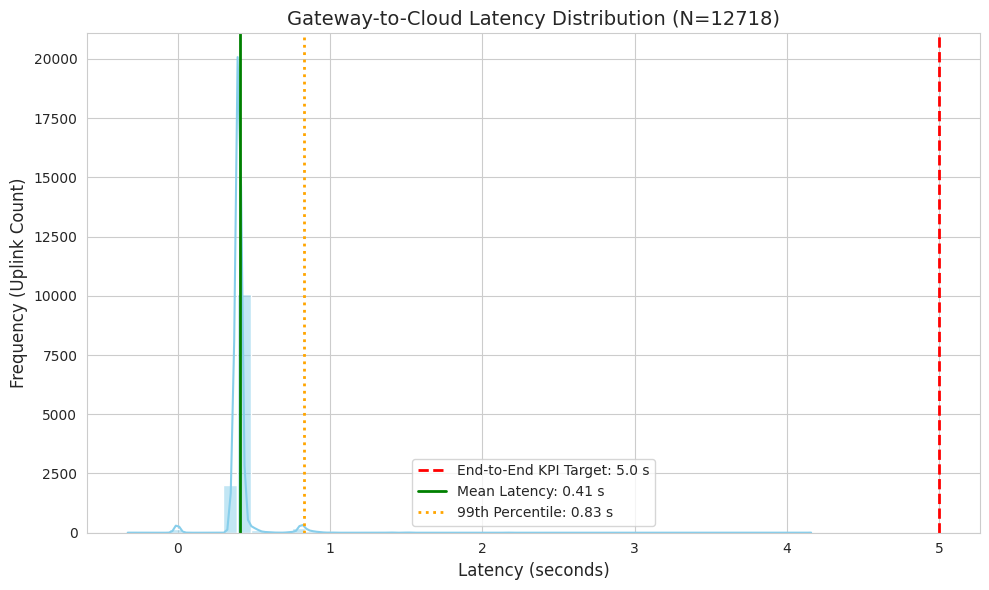

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'
KPI_TARGET_SECONDS = 5.0

# --- 1. Load Data ---
df = pd.read_csv(INPUT_FILE_NAME)

# --- 2. Data Preparation ---
# Convert latency from milliseconds to seconds
df['latency_s'] = df['latency_ms'] / 1000

# Calculate key statistics
mean_latency = df['latency_s'].mean()
p99_latency = df['latency_s'].quantile(0.99)
max_latency = df['latency_s'].max()

# --- 3. Plotting ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(df['latency_s'], bins=50, kde=True, color='skyblue')

# Add KPI and statistical lines
plt.axvline(KPI_TARGET_SECONDS, color='red', linestyle='--', linewidth=2, label=f'End-to-End KPI Target: {KPI_TARGET_SECONDS:.1f} s')
plt.axvline(mean_latency, color='green', linestyle='-', linewidth=2, label=f'Mean Latency: {mean_latency:.2f} s')
plt.axvline(p99_latency, color='orange', linestyle=':', linewidth=2, label=f'99th Percentile: {p99_latency:.2f} s')

# Set labels and title
plt.title(f'Gateway-to-Cloud Latency Distribution (N={len(df)})', fontsize=14)
plt.xlabel('Latency (seconds)', fontsize=12)
plt.ylabel('Frequency (Uplink Count)', fontsize=12)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('latency_distribution_histogram.png')
print("✅ Latency distribution histogram saved as 'latency_distribution_histogram.png'")

# Print the key findings
print(f"\n--- Latency Performance Summary ---")
print(f"Mean Latency: {mean_latency:.2f} s")
print(f"99th Percentile Latency: {p99_latency:.2f} s")
print(f"Max Latency: {max_latency:.2f} s")

**Signal Quality vs. Estimated Distance Scatter Plot (Coverage Analysis)**  
The scatter plot visually validates the relationship between the received signal strength (RSSI) and the distance estimated by custom regression model trained from field data, grouped by Spreading Factor (SF).

Available columns in the dataset:
['received_at', 'gateway_time', 'gateway_timestamp', 'rssi', 'channel_rssi', 'snr', 'uplink_token', 'gateway_id', 'f_cnt', 'frm_payload', 'spreading_factor', 'latency_ms', 'payload_bytes', 'Estimated Distance (m)', 'Time Between Transmissions (s)']


✅ Found distance column: 'Estimated Distance (m)'
✅ RSSI vs. Distance scatter plot saved as 'rssi_vs_distance_by_sf.png'


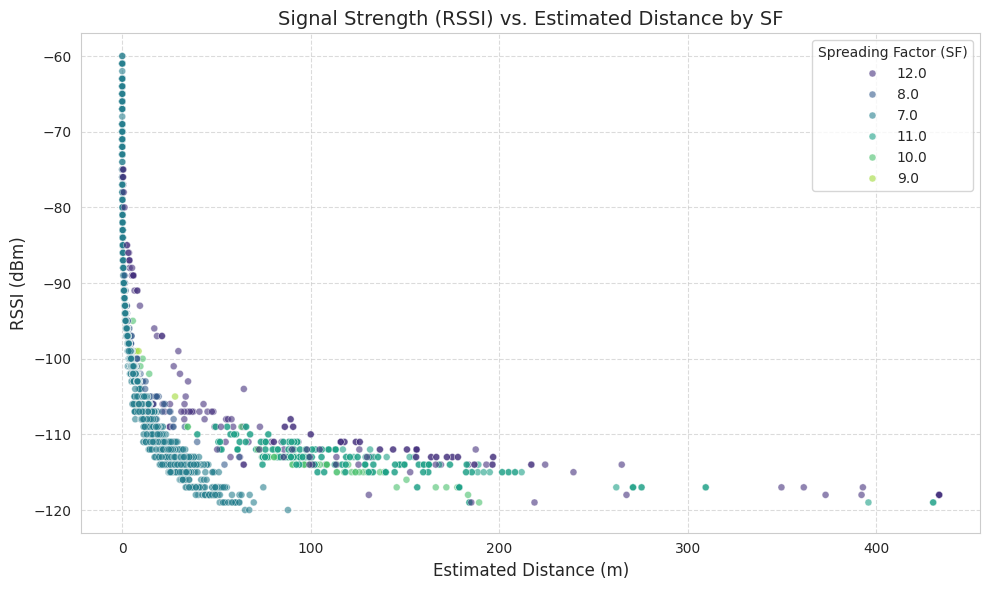

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- Configuration ---
# INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'
# # FIX APPLIED: Changed the variable definition to match the actual column name in the generated CSV.
# DISTANCE_COLUMN = 'Estimated Distance (m)'

# # --- 1. Load Data ---
# df = pd.read_csv(INPUT_FILE_NAME)

# # --- 2. Plotting ---
# sns.set_style("whitegrid")
# plt.figure(figsize=(10, 6))

# # Plotting Estimated Distance vs. RSSI, colored by Spreading Factor
# # We convert SF to a string category for discrete coloring in the legend
# sns.scatterplot(
#     data=df,
#     x=DISTANCE_COLUMN,  # Now uses 'Estimated Distance (m)'
#     y='rssi',
#     hue=df['spreading_factor'].astype(str), # Convert to string for discrete colors
#     palette='viridis',
#     alpha=0.6,
#     s=25
# )

# # Set labels and title
# plt.title('Signal Strength (RSSI) vs. Estimated Distance by SF', fontsize=14)
# # The label is now automatically correct as it matches the column name
# plt.xlabel('Estimated Distance (meters)', fontsize=12)
# plt.ylabel('RSSI (dBm)', fontsize=12)
# plt.legend(title='Spreading Factor (SF)')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()

# # Save the plot
# plt.savefig('rssi_vs_distance_by_sf.png')
# print("✅ RSSI vs. Distance scatter plot saved as 'rssi_vs_distance_by_sf.png'")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'

# --- 1. Load Data ---
df = pd.read_csv(INPUT_FILE_NAME)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# --- DIAGNOSTIC: Print available columns ---
print("Available columns in the dataset:")
print(df.columns.tolist())
print("\n")

# --- SMART COLUMN DETECTION ---
# Find the distance column dynamically
distance_column = None
possible_keywords = ['distance', 'range', 'estimated']

for col in df.columns:
    if any(keyword in col.lower() for keyword in possible_keywords):
        distance_column = col
        print(f"✅ Found distance column: '{distance_column}'")
        break

if distance_column is None:
    print("⚠️ No distance column found. Available columns:")
    print(df.columns.tolist())
    raise ValueError("Could not find a distance/range column in the dataset")

# --- 2. Plotting ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plotting Estimated Distance vs. RSSI, colored by Spreading Factor
# We convert SF to a string category for discrete coloring in the legend
sns.scatterplot(
    data=df,
    x=distance_column,  # Uses the detected column name
    y='rssi',
    hue=df['spreading_factor'].astype(str), # Convert to string for discrete colors
    palette='viridis',
    alpha=0.6,
    s=25
)

# Set labels and title
plt.title('Signal Strength (RSSI) vs. Estimated Distance by SF', fontsize=14)
plt.xlabel(f'{distance_column}', fontsize=12)
plt.ylabel('RSSI (dBm)', fontsize=12)
plt.legend(title='Spreading Factor (SF)', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('rssi_vs_distance_by_sf.png', dpi=300, bbox_inches='tight')
print(f"✅ RSSI vs. Distance scatter plot saved as 'rssi_vs_distance_by_sf.png'")

**Hourly Traffic Load Time Series Plot (Node Handling Capacity)**  
This plot visualize the consistency and volume of traffic handled by the gateway over the entire measurement period, which supports the 20-node traffic KPI evaluation

✅ Hourly traffic load plot saved as 'hourly_traffic_load.png'
Test Duration: 11 days


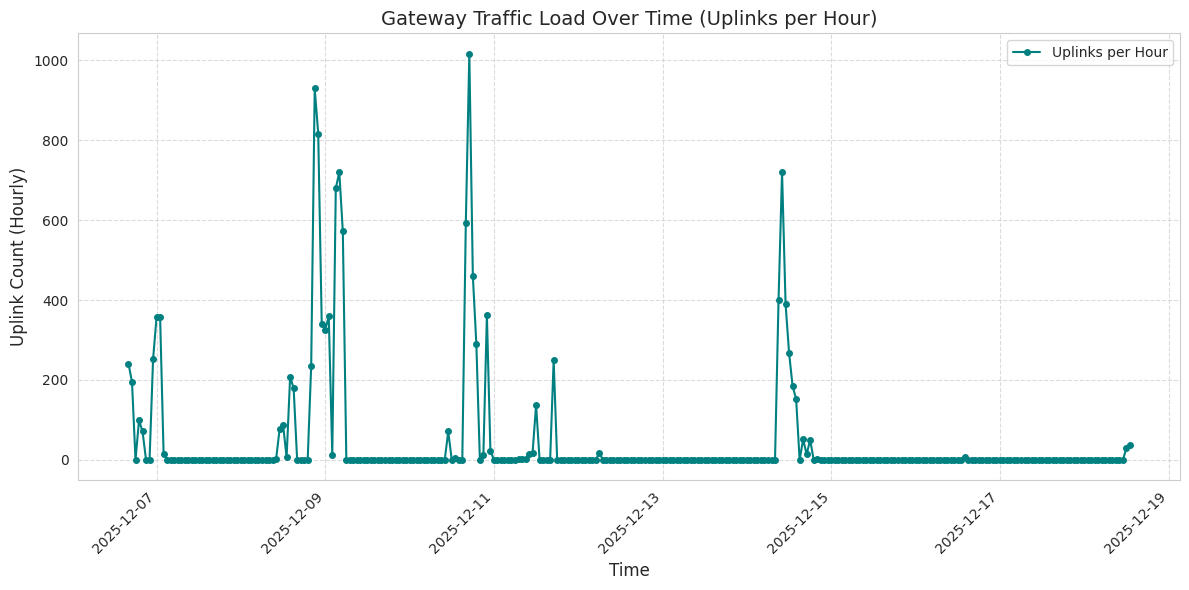

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'

# --- 1. Load Data ---
df = pd.read_csv(INPUT_FILE_NAME)

# --- 2. Data Preparation ---
# Ensure 'received_at' is in datetime format for resampling
df['received_at'] = pd.to_datetime(df['received_at'])

# Resample the data to get the count of uplinks per hour (Traffic Load)
traffic_load_hourly = df.set_index('received_at').resample('1H').size()
traffic_df = traffic_load_hourly.reset_index(name='Uplink_Count')

# --- 3. Plotting ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot the hourly traffic load
plt.plot(traffic_df['received_at'], traffic_df['Uplink_Count'],
         marker='o', linestyle='-', color='teal', markersize=4, label='Uplinks per Hour')

# Set labels and title
plt.title('Gateway Traffic Load Over Time (Uplinks per Hour)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Uplink Count (Hourly)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('hourly_traffic_load.png')
print("✅ Hourly traffic load plot saved as 'hourly_traffic_load.png'")

# Print traffic duration for context
test_duration = (df['received_at'].max() - df['received_at'].min()).days
print(f"Test Duration: {test_duration} days")

**RSSI Distribution by Spreading Factor (SF) - Box Plot**  
This plot demonstrates the fundamental trade-off between sensitivity and data rate in LoRaWAN. It shows the range of RSSI values the gateway successfully decoded for each SF.
**Insights**  
**Sensitivity Proof:** You should see that higher SF values (e.g., SF12) have a median RSSI that is more negative (weaker signal) than lower SFs (e.g., SF7). This visually proves that your gateway achieves greater sensitivity and thus longer range when using higher SFs, validating the configuration.

**Signal Consistency:** The size of the boxes (Interquartile Range) shows how stable the RSSI is for that specific SF across your network.

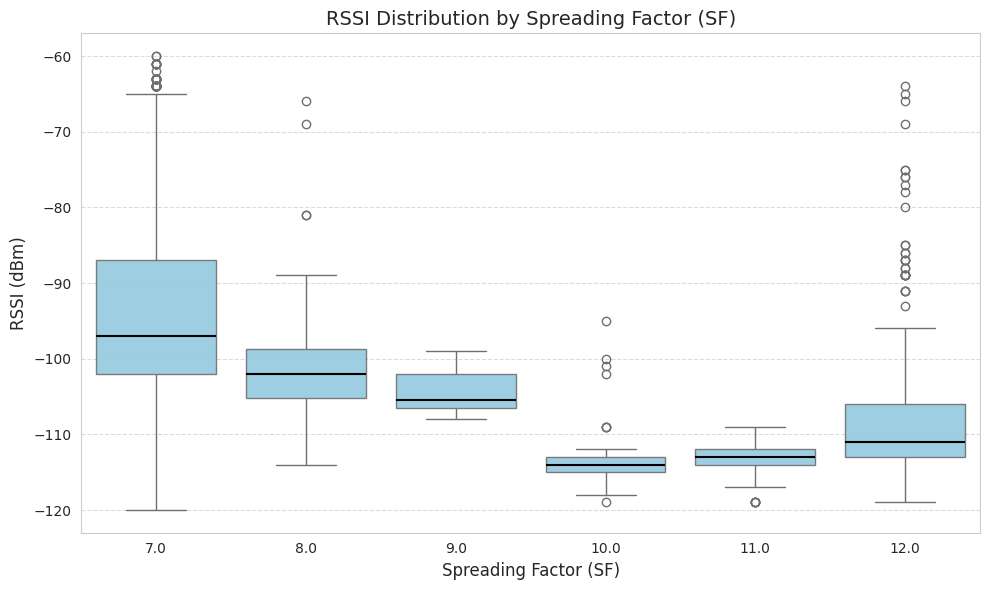

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'

# --- 1. Load Data ---
df = pd.read_csv(INPUT_FILE_NAME)

# Ensure SF is treated as a category for the box plot (e.g., '7.0', '8.0')
df['spreading_factor_str'] = df['spreading_factor'].astype(str)

# --- 2. Fix for ValueError ---
# FIX APPLIED: Robustly sort the unique string categories numerically.
order_list = sorted(df['spreading_factor_str'].unique(), key=float)

# --- Plotting ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='spreading_factor_str',
    y='rssi',
    color='skyblue',
    # Using the robustly generated order_list
    order=order_list,
    boxprops=dict(alpha=0.9),
    medianprops=dict(color='black', linewidth=1.5)
)

# Set labels and title
plt.title('RSSI Distribution by Spreading Factor (SF)', fontsize=14)
plt.xlabel('Spreading Factor (SF)', fontsize=12)
plt.ylabel('RSSI (dBm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('rssi_distribution_by_sf.png')

**SNR vs. RSSI Scatter Plot (Link Quality)**  
The classic wireless systems plot maps the Signal-to-Noise Ratio (link quality) against the Received Signal Strength Indicator (received power). Coloring the points by estimated distance adds a layer of depth.

**Insights**  
**Link Quality Dependency:** You should observe a strong, nearly linear correlation where higher RSSI values lead to higher SNR values. This confirms that the noise floor of your environment is relatively stable.

**Noise Floor Analysis:** Points deviating significantly below the main cluster (low SNR for high RSSI) indicate transient high-noise events, providing insight into the spectral environment your gateway operates in.

**Distance Correlation: **The color gradient will show that packets received from the furthest distances (darker colors) tend to cluster toward the lower-left corner (lower RSSI, lower SNR), which is expected for high-attenuation links.

Available columns in the dataset:
['received_at', 'gateway_time', 'gateway_timestamp', 'rssi', 'channel_rssi', 'snr', 'uplink_token', 'gateway_id', 'f_cnt', 'frm_payload', 'spreading_factor', 'latency_ms', 'payload_bytes', 'Estimated Distance (m)', 'Time Between Transmissions (s)']


✅ Found distance column: 'Estimated Distance (m)'

✅ SNR vs. RSSI scatter plot successfully generated and saved as 'snr_vs_rssi_scatter.png'


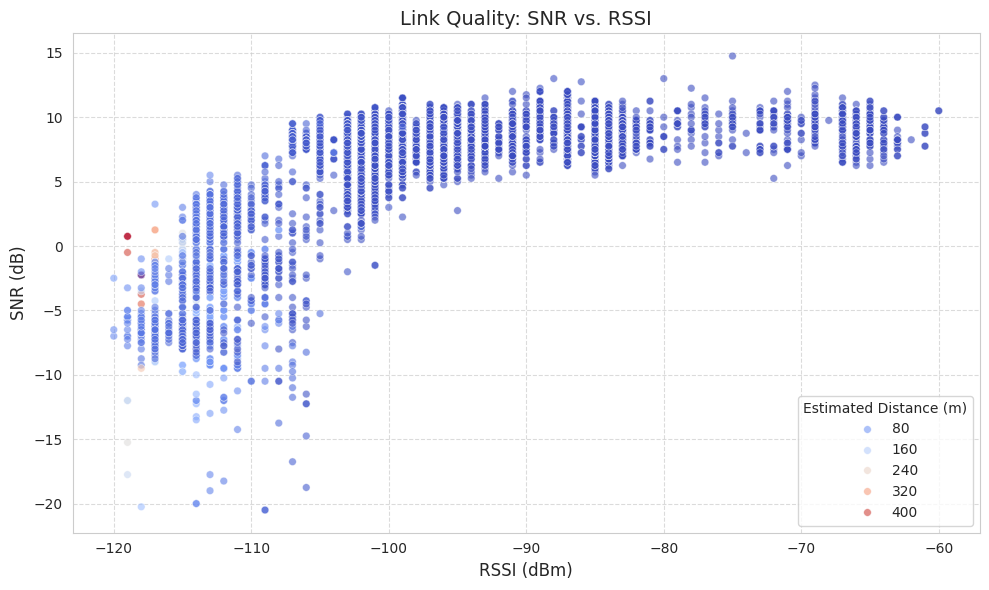

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'

# --- 1. Load Data ---
df = pd.read_csv(INPUT_FILE_NAME)

# --- CRITICAL FIX ---
# Remove hidden whitespace from all column names
df.columns = df.columns.str.strip()

# --- DIAGNOSTIC: Print available columns ---
print("Available columns in the dataset:")
print(df.columns.tolist())
print("\n")

# --- SMART COLUMN DETECTION ---
# Find the distance/range column dynamically
distance_column = None
possible_names = ['Estimated Range (m)', 'estimated range (m)',
                  'Estimated Range', 'Distance (m)', 'distance',
                  'range', 'Range (m)']

for col in df.columns:
    if any(name.lower() in col.lower() for name in ['range', 'distance']):
        distance_column = col
        print(f"✅ Found distance column: '{distance_column}'")
        break

if distance_column is None:
    print("⚠️ No distance column found. Available columns:")
    print(df.columns.tolist())
    print("\nPlotting without distance coloring...")
    use_hue = False
else:
    use_hue = True

# --- Plotting ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

if use_hue:
    sns.scatterplot(
        data=df,
        x='rssi',
        y='snr',
        hue=distance_column,
        palette='coolwarm',
        alpha=0.6,
        s=30
    )
    plt.legend(title=f'{distance_column}', loc='lower right')
else:
    sns.scatterplot(
        data=df,
        x='rssi',
        y='snr',
        alpha=0.6,
        s=30
    )

# Set labels and title
plt.title('Link Quality: SNR vs. RSSI', fontsize=14)
plt.xlabel('RSSI (dBm)', fontsize=12)
plt.ylabel('SNR (dB)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('snr_vs_rssi_scatter.png', dpi=300, bbox_inches='tight')
print("\n✅ SNR vs. RSSI scatter plot successfully generated and saved as 'snr_vs_rssi_scatter.png'")
plt.show()

**Temporal Stability of Link Quality (Daily Mean RSSI and SNR)**  
This analysis addresses the long-term reliability of the gateway's performance in its deployment environment. Stable signal statistics across days suggest a reliable link, while significant daily variations would indicate environmental factors (e.g., changes in weather, foliage, or noise sources).

Insights  
**Deployment Stability:** This plot confirms whether the average link quality holds steady over the multiple-day test period, proving the gateway's performance is consistent and not subject to drastic daily decay.

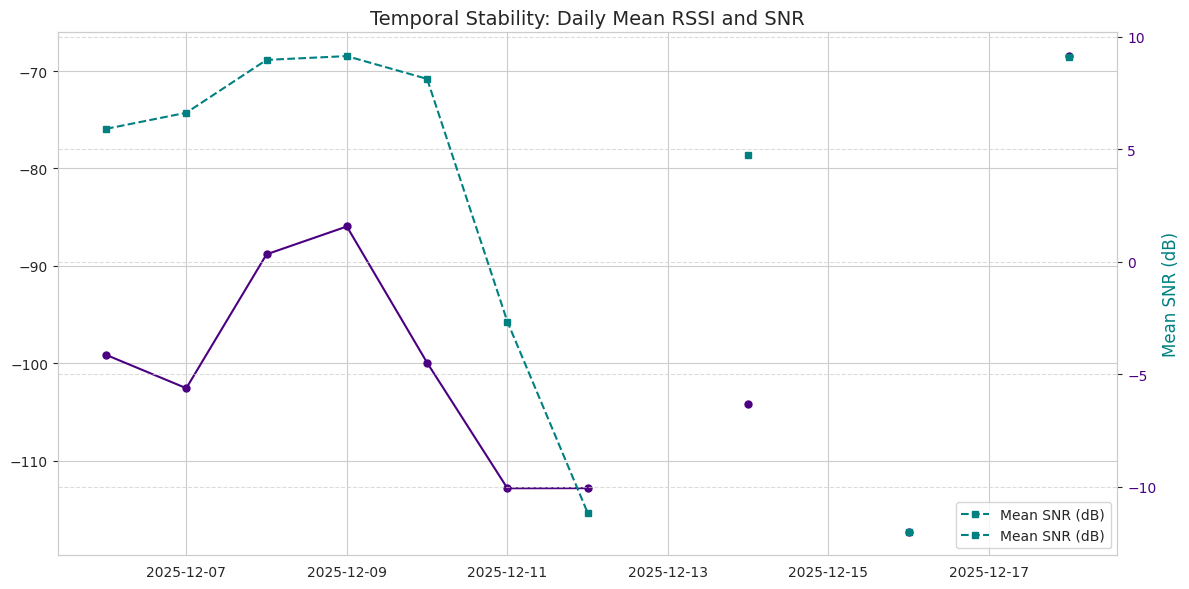

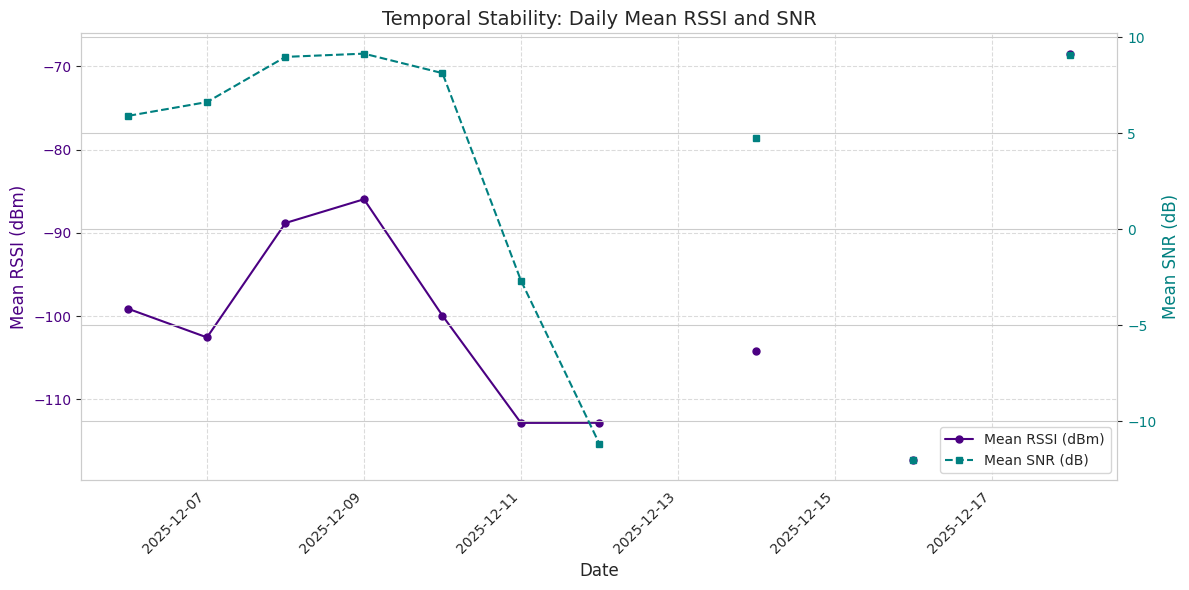

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'

# --- 1. Load Data & Prepare ---
df = pd.read_csv(INPUT_FILE_NAME)
df['received_at'] = pd.to_datetime(df['received_at'])

# Resample data to a daily average for temporal stability analysis
daily_stats = df.set_index('received_at')[['snr', 'rssi']].resample('D').mean()
daily_stats = daily_stats.reset_index()

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot Daily Mean RSSI
plt.plot(daily_stats['received_at'], daily_stats['rssi'],
         marker='o', linestyle='-', color='indigo', markersize=5, label='Mean RSSI (dBm)')

# Create a secondary axis for SNR
ax2 = plt.gca().twinx()
ax2.plot(daily_stats['received_at'], daily_stats['snr'],
         marker='s', linestyle='--', color='teal', markersize=5, label='Mean SNR (dB)')

# Set labels and titles
plt.title('Temporal Stability: Daily Mean RSSI and SNR', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean RSSI (dBm)', fontsize=12, color='indigo',loc='center')
ax2.set_ylabel('Mean SNR (dB)', fontsize=12, color='teal')

# Color the axis ticks and labels to match the plot line
ax2.tick_params(axis='y', labelcolor='teal')
plt.gca().tick_params(axis='y', labelcolor='indigo')

# Adjust legend location
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('temporal_stability_rssi_snr.png')

############################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'

# --- 1. Load Data & Prepare ---
df = pd.read_csv(INPUT_FILE_NAME)
df['received_at'] = pd.to_datetime(df['received_at'])

# Resample data to a daily average for temporal stability analysis
daily_stats = df.set_index('received_at')[['snr', 'rssi']].resample('D').mean()
daily_stats = daily_stats.reset_index()

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Daily Mean RSSI on the left y-axis
line1 = ax1.plot(daily_stats['received_at'], daily_stats['rssi'],
                  marker='o', linestyle='-', color='indigo', markersize=5, label='Mean RSSI (dBm)')

# Set labels for left y-axis (RSSI)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Mean RSSI (dBm)', fontsize=12, color='indigo')
ax1.tick_params(axis='y', labelcolor='indigo')

# Create a secondary axis for SNR on the right
ax2 = ax1.twinx()
line2 = ax2.plot(daily_stats['received_at'], daily_stats['snr'],
                  marker='s', linestyle='--', color='teal', markersize=5, label='Mean SNR (dB)')

# Set labels for right y-axis (SNR)
ax2.set_ylabel('Mean SNR (dB)', fontsize=12, color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

# Set title
plt.title('Temporal Stability: Daily Mean RSSI and SNR', fontsize=14)

# Combine legends from both axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

# Format x-axis
ax1.tick_params(axis='x', rotation=45)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the plot
plt.savefig('temporal_stability_rssi_snr1.png')
plt.show()

**Latency Distribution by Spreading Factor (Performance Trade-off)**  
This analysis evaluates the trade-off between maximizing range (using high SF) and minimizing application-layer delay (due to network processing and potentially longer airtime). While the gateway-to-cloud latency is dominant, this plot can reveal subtle differences in processing overhead based on the SF.

**Insights**  
Efficiency vs. Range: If the gateway-to-cloud latency remains constant across all SFs, it proves the gateway's processing time is negligible compared to the network server overhead. If higher SFs show slightly higher latency, it might point to airtime or network server bottlenecks associated with those data rates.

✅ Latency distribution plot successfully generated and saved as 'latency_distribution_by_sf.png'


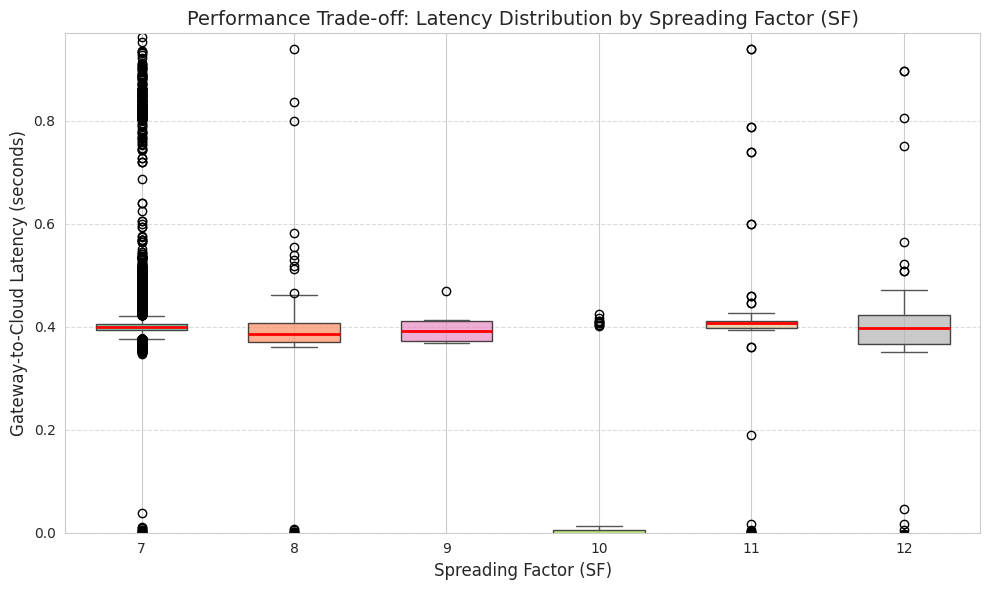

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'

# --- 1. Load Data & Prepare ---
df = pd.read_csv(INPUT_FILE_NAME)
df.columns = df.columns.str.strip()

# Ensure SF is treated as a category and Latency is in seconds
df['latency_s'] = df['latency_ms'] / 1000

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 6))

# Get sorted spreading factors
sf_values = sorted(df['spreading_factor'].unique().astype(int))
sf_labels = [str(sf) for sf in sf_values]

# Prepare data for boxplot
data_by_sf = [df[df['spreading_factor'] == sf]['latency_s'].values for sf in sf_values]

# Create boxplot
bp = ax.boxplot(data_by_sf,
                labels=sf_labels,
                patch_artist=True,
                widths=0.6)

# Customize colors
colors = plt.cm.Set2(np.linspace(0, 1, len(sf_values)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Style the plot
for element in ['whiskers', 'fliers', 'caps']:
    plt.setp(bp[element], color='#555555', linewidth=1)
plt.setp(bp['medians'], color='red', linewidth=2)

# Set labels and title
ax.set_title('Performance Trade-off: Latency Distribution by Spreading Factor (SF)', fontsize=14)
ax.set_xlabel('Spreading Factor (SF)', fontsize=12)
ax.set_ylabel('Gateway-to-Cloud Latency (seconds)', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set a reasonable Y-axis limit
y_limit = df['latency_s'].quantile(0.995)
ax.set_ylim(0, y_limit + 0.1)

plt.tight_layout()
plt.savefig('latency_distribution_by_sf.png', dpi=300, bbox_inches='tight')
print("✅ Latency distribution plot successfully generated and saved as 'latency_distribution_by_sf.png'")
plt.show()

**The distribution of signal quality in the network.**  
**Mean RSSI:** The red dashed line shows the average signal strength your gateway received.

**Distribution Shape:** The shape of the histogram indicates the consistency of your signal. A narrow, tall distribution means the signal is consistently strong, while a broad, short distribution suggests highly variable link quality across different nodes or distances.

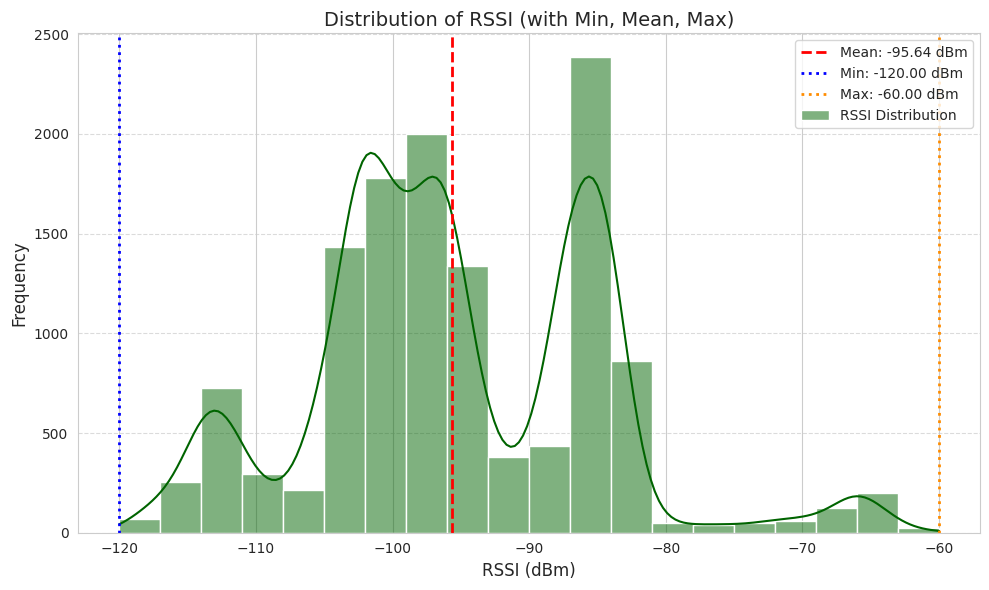

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
INPUT_FILE_NAME = 'ttn_uplinks_performance.csv'
RSSI_COLUMN = 'rssi'
OUTPUT_PLOT_NAME = 'rssi_distribution_min_max.png'

# --- 1. Load Data ---
df = pd.read_csv(INPUT_FILE_NAME)

# Ensure RSSI is numeric and drop missing values for plotting
df[RSSI_COLUMN] = pd.to_numeric(df[RSSI_COLUMN], errors='coerce')
df_plot = df.dropna(subset=[RSSI_COLUMN])

# --- 2. Calculate Min, Mean, Max RSSI ---
min_rssi = df_plot[RSSI_COLUMN].min()
mean_rssi = df_plot[RSSI_COLUMN].mean()
max_rssi = df_plot[RSSI_COLUMN].max()

# --- 3. Visualization: RSSI Distribution (Histogram) ---
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(df_plot[RSSI_COLUMN], kde=True, bins=20, color='darkgreen',
             label='RSSI Distribution')

# Set labels and title
plt.title('Distribution of RSSI (with Min, Mean, Max)', fontsize=14)
plt.xlabel('RSSI (dBm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# --- Add vertical lines for Min, Mean, Max ---

# Mean RSSI (Red Dashed)
plt.axvline(mean_rssi, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {mean_rssi:.2f} dBm')

# Min RSSI (Blue Dotted)
plt.axvline(min_rssi, color='blue', linestyle='dotted', linewidth=2,
            label=f'Min: {min_rssi:.2f} dBm')

# Max RSSI (Orange Dotted)
plt.axvline(max_rssi, color='darkorange', linestyle='dotted', linewidth=2,
            label=f'Max: {max_rssi:.2f} dBm')

# Ensure all labels are visible in the legend
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig(OUTPUT_PLOT_NAME)

**Distribution of RSSI**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Clean Data ---
INPUT_FILE_NAME = 'query (1).csv'

# Load the data, skipping the initial 4 metadata/header rows
df = pd.read_csv(INPUT_FILE_NAME, skiprows=4, header=None)

# Manually assign standard, readable names to the relevant columns based on their indices
column_map = {
    5: '_time',    # Application Server Timestamp
    6: '_value',   # The measured value (must be numeric)
    7: '_field',   # The metric name (e.g., 'rssi', 'snr')
    10: 'device'   # Device ID
}

# Select and rename the relevant columns
df_clean = df.rename(columns=column_map).copy()
df_clean = df_clean[column_map.values()].copy()

# Convert the timestamp column to datetime objects
df_clean['_time'] = pd.to_datetime(df_clean['_time'], errors='coerce')

# Filter out non-numeric fields and convert values to numeric
expected_numeric_fields = ['rssi', 'snr', 'temperature', 'humidity', 'battery_voltage']
df_clean = df_clean[df_clean['_field'].isin(expected_numeric_fields)].copy()
df_clean['_value'] = pd.to_numeric(df_clean['_value'], errors='coerce')
df_clean.dropna(subset=['_value'], inplace=True)


# --- 2. Pivot to Wide Format (One Row per Uplink) ---

# Pivot the data to a 'wide' format where each uplink (defined by time/device)
# is a single row, and each metric (rssi, snr, temp) is its own column.
df_wide = df_clean.pivot_table(
    index=['_time', 'device'],
    columns='_field',
    values='_value',
    aggfunc='mean'
).reset_index()

# Clean up column names after pivot
df_wide.columns.name = None

# --- 3. Latency and Time Between Transmissions (TBT) Analysis ---

# Calculate Time Between Transmissions (TBT) per device (Proxy for Uplink Rate Consistency)
df_wide = df_wide.sort_values(by=['device', '_time']).reset_index(drop=True)
df_wide['Time Between Transmissions (s)'] = df_wide.groupby('device')['_time'].diff().dt.total_seconds()

# Save the final processed data to a new CSV file
OUTPUT_FILE_NAME = 'ttn_uplinks_processed.csv'
df_wide.to_csv(OUTPUT_FILE_NAME, index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'query (1).csv'